# Ada Michocka
Projekt studencki/ Studen't project

Opis zbioru danych/ Description of the dataset:
---

Źródło danych/ Data source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality 

PL: Zbiór powstał w wyniku badań na Uniwersytecie w Minho w Portugalii.

Zawiera modelowanie preferencji wina poprzez eksplorację danych z właściwości fizykochemicznych.

Utworzono dwa zbiory danych, używając próbek czerwonego i białego wina. 

W zbiorach brak pustych wartości.

ENG: The dataset is the result of research at the University of Minho in Portugal.

It includes modeling wine preferences by exploring data from physicochemical properties.

Two datasets were created using samples of red and white wine.

There are no empty values in the sets.

In [1]:
import numpy as np
import pandas as pd
import io
import os
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

In [2]:
def load_dataset(path, urls):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        data = requests.get(url).content
        filename = os.path.join(path, os.path.basename(url))
        with open(filename, "wb") as file:
            file.write(data)

In [3]:
urls = ["https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
       "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"]
load_dataset('data', urls)

In [4]:
red_wine_data = pd.read_csv('data/winequality-red.csv', sep=';', engine='python')
white_wine_data = pd.read_csv('data/winequality-white.csv', sep=';', engine='python')


 Analiza eksploracyjna/ Exploratory Data Analysis:
 ---

1. Wino czerwone/ Red wine:

In [5]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

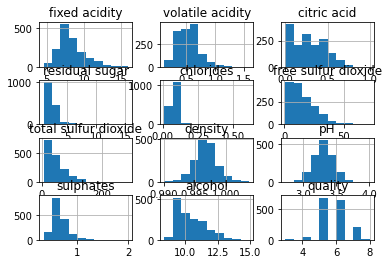

In [7]:
red_wine_data.hist()

<AxesSubplot:xlabel='quality', ylabel='count'>

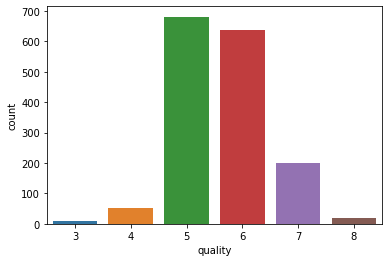

In [8]:
sns.countplot(red_wine_data['quality'])

<AxesSubplot:xlabel='count', ylabel='fixed acidity'>

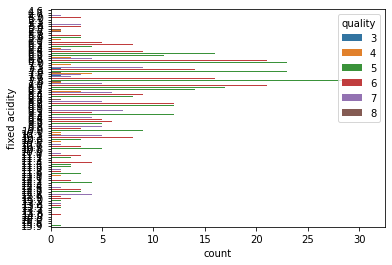

In [9]:
sns.countplot(y='fixed acidity', hue='quality', data = red_wine_data)

<AxesSubplot:xlabel='count', ylabel='volatile acidity'>

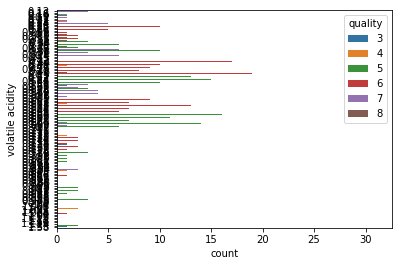

In [10]:
sns.countplot(y='volatile acidity', hue='quality', data = red_wine_data)

<AxesSubplot:xlabel='count', ylabel='citric acid'>

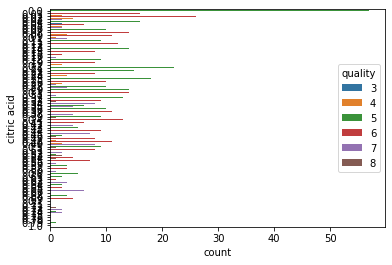

In [11]:
sns.countplot(y='citric acid', hue='quality', data = red_wine_data)

<AxesSubplot:xlabel='count', ylabel='residual sugar'>

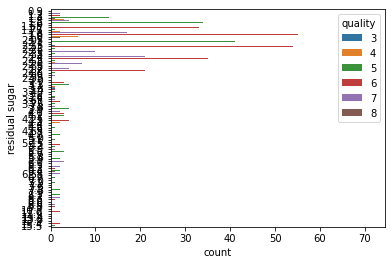

In [12]:
sns.countplot(y='residual sugar', hue='quality', data = red_wine_data)

<AxesSubplot:xlabel='count', ylabel='chlorides'>

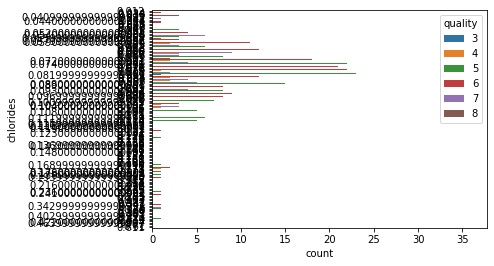

In [13]:
sns.countplot(y='chlorides', hue='quality', data = red_wine_data)

<AxesSubplot:xlabel='count', ylabel='free sulfur dioxide'>

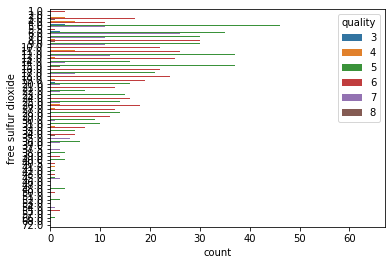

In [14]:
sns.countplot(y='free sulfur dioxide', hue='quality', data = red_wine_data)

<AxesSubplot:xlabel='count', ylabel='total sulfur dioxide'>

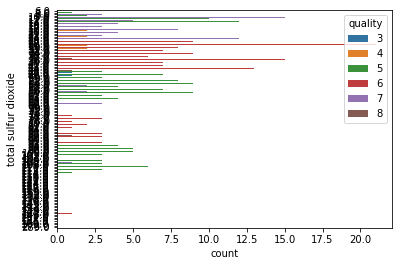

In [15]:
sns.countplot(y='total sulfur dioxide', hue='quality', data = red_wine_data)

<AxesSubplot:xlabel='count', ylabel='density'>

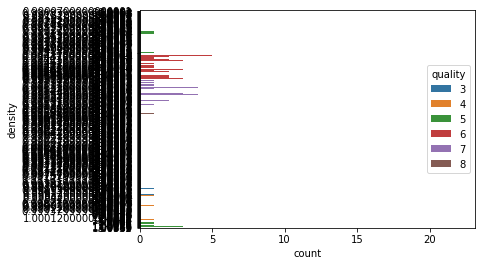

In [16]:
sns.countplot(y='density', hue='quality', data = red_wine_data)

<AxesSubplot:xlabel='count', ylabel='pH'>

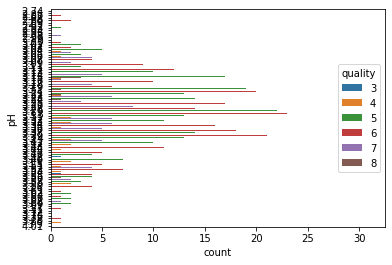

In [17]:
sns.countplot(y='pH', hue='quality', data = red_wine_data)

<AxesSubplot:xlabel='count', ylabel='sulphates'>

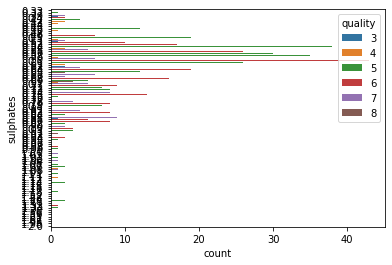

In [18]:
sns.countplot(y='sulphates', hue='quality', data = red_wine_data)

<AxesSubplot:xlabel='count', ylabel='alcohol'>

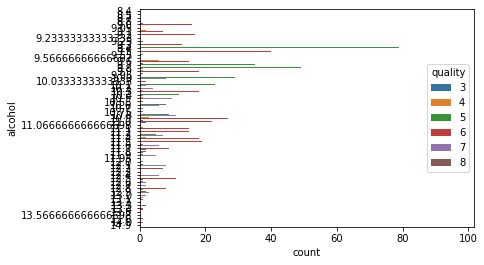

In [19]:
sns.countplot(y='alcohol', hue='quality', data = red_wine_data)

PL: Podsumowanie: Można zaobserwować korelacje między jakością wina czerwonego a całkowitym dwutlenkiem siarki, gęstością oraz ilością alkoholu w winie. Pozostałe atrybuty mają mniejszy lub brak wpływu na jakość wina czerwonego.

ENG: Summary: Correlation can be observed between the quality of red wine and the total sulfur dioxide, density and alcohol content of the wine. The remaining attributes have little or no effect on the quality of the red wine.

2. Wino białe/ White wine:

In [20]:
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [21]:
white_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

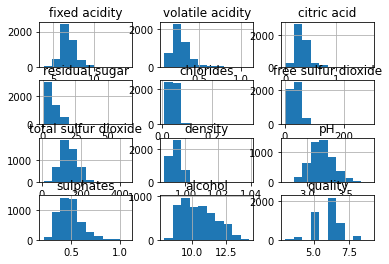

In [22]:
white_wine_data.hist()

<AxesSubplot:xlabel='quality', ylabel='count'>

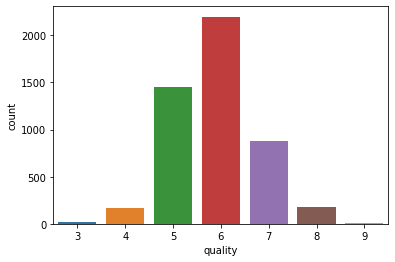

In [23]:
sns.countplot(white_wine_data['quality'])

<AxesSubplot:xlabel='count', ylabel='fixed acidity'>

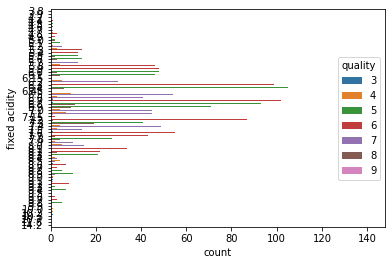

In [24]:
sns.countplot(y='fixed acidity', hue='quality', data = white_wine_data)

<AxesSubplot:xlabel='count', ylabel='volatile acidity'>

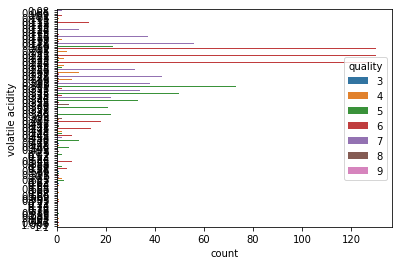

In [25]:
sns.countplot(y='volatile acidity', hue='quality', data = white_wine_data)

<AxesSubplot:xlabel='count', ylabel='citric acid'>

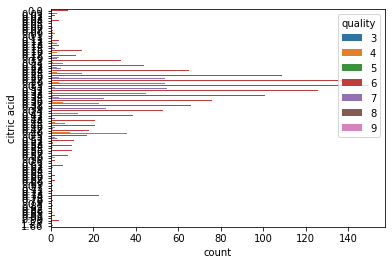

In [26]:
sns.countplot(y='citric acid', hue='quality', data = white_wine_data)

<AxesSubplot:xlabel='count', ylabel='residual sugar'>

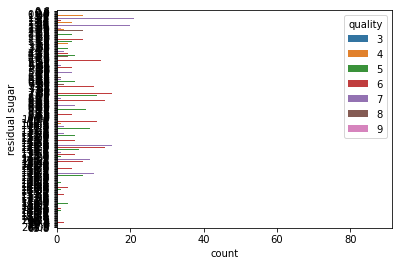

In [27]:
sns.countplot(y='residual sugar', hue='quality', data = white_wine_data)

<AxesSubplot:xlabel='count', ylabel='chlorides'>

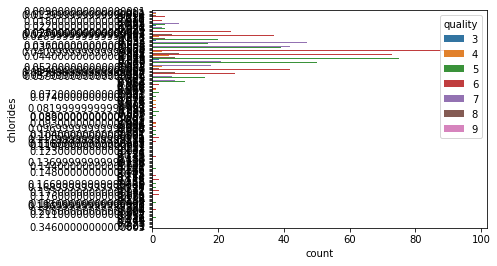

In [28]:
sns.countplot(y='chlorides', hue='quality', data = white_wine_data)

<AxesSubplot:xlabel='count', ylabel='free sulfur dioxide'>

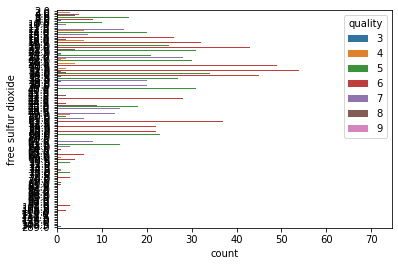

In [29]:
sns.countplot(y='free sulfur dioxide', hue='quality', data = white_wine_data)

<AxesSubplot:xlabel='count', ylabel='total sulfur dioxide'>

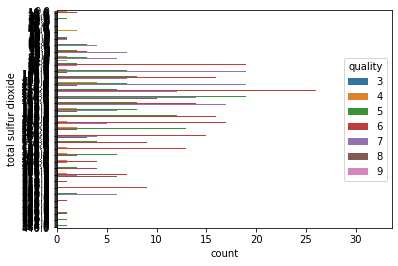

In [30]:
sns.countplot(y='total sulfur dioxide', hue='quality', data = white_wine_data)

<AxesSubplot:xlabel='count', ylabel='density'>

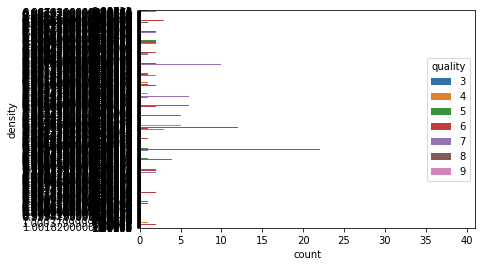

In [31]:
sns.countplot(y='density', hue='quality', data = white_wine_data)

<AxesSubplot:xlabel='count', ylabel='pH'>

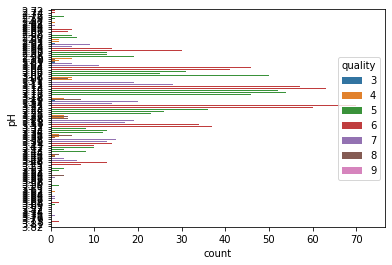

In [32]:
sns.countplot(y='pH', hue='quality', data = white_wine_data)

<AxesSubplot:xlabel='count', ylabel='sulphates'>

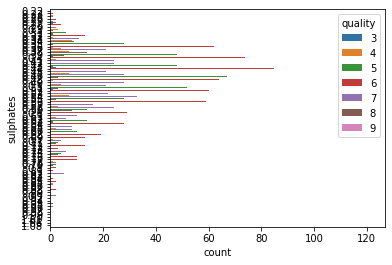

In [33]:
sns.countplot(y='sulphates', hue='quality', data = white_wine_data)

<AxesSubplot:xlabel='count', ylabel='alcohol'>

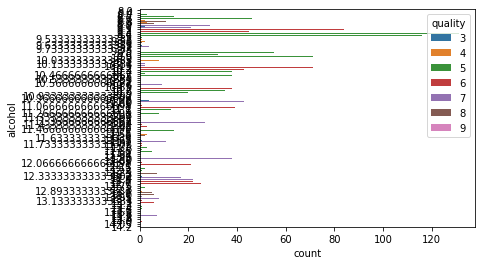

In [34]:
sns.countplot(y='alcohol', hue='quality', data = white_wine_data)

PL: Podsumowanie: Można zaobserwować korelacje między jakością wina białego a lotną kwasowością, kwasem cytrynowym, gęstością oraz ilością alkoholu w winie . Pozostałe atrybuty mają mniejszy lub brak wpływu na jakość wina białego.

ENG: Summary: Correlation can be observed between the quality of white wine and the volatile acidity, citric acid, density and the amount of alcohol in the wine. The remaining attributes have little or no impact on the quality of the white wine.

Uczenie maszynowe/ Machine Learning:
---

In [35]:
class ColumnsSelector(BaseEstimator, TransformerMixin):
  
  def __init__(self, type):
    self.type = type
  
  def fit(self, X, y=None):
    return self
  
  def transform(self,X):
    return X.select_dtypes(include=[self.type])

In [36]:
#nie użyłam Pipeline ponieważ Jupyter nie mógł go przetworzyć
def createPipeline():
    # Build in method
    cat_pipeline = Pipeline(steps=[
        ("cat_attr_selector", ColumnsSelector(type='object')),
        ("cat_imputer", SimpleImputer(strategy='most_frequent')),
        ("encoder", OneHotEncoder())
    ])

    # Create pipline for numeric data
    num_pipeline = Pipeline(steps=[
        ("num_attr_selector", ColumnsSelector(type='int')),
        ("scaler", StandardScaler())
    ])

    fullPipeline = FeatureUnion([("num_pipe", num_pipeline), ("cat_pipeline", cat_pipeline)])

    return fullPipeline

1. Wino czerwone/ Red wine:

Budowanie modelu/ Building the Model

In [37]:
full_pipeline = createPipeline()

In [38]:
train_data_red = red_wine_data.head(int(len(red_wine_data.index)/2))
test_data_red = red_wine_data.tail(int(len(red_wine_data.index)/2))

Przygotowanie danych do trenowania/ Preparing the data for training¶

In [39]:
train_copy_red = train_data_red.copy()

In [40]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
red_wine_data['quality'] = pd.cut(red_wine_data['quality'], bins = bins, labels = group_names)
red_wine_data['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [41]:
label_quality = LabelEncoder()

In [42]:
red_wine_data['quality'] = label_quality.fit_transform(red_wine_data['quality'])

In [43]:
red_wine_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Trenowanie i testowanie modelu/ Training and testing the model

In [44]:
X_red = train_copy_red.drop('quality', axis =1)
Y_red = train_copy_red['quality']

In [45]:
sc = StandardScaler()
X_train_red = sc.fit_transform(X_red)

print(X_train_red.shape)

(799, 11)


In [46]:
model = LogisticRegression(random_state=0)
model.fit(X_train_red, Y_red)

C:\Users\amich\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [47]:
model.coef_

array([[ 0.39213493,  1.12001534,  0.75944622,  0.09588522,  0.47956103,
        -0.46553405, -0.28184418,  0.55244953,  0.81455911, -0.43044895,
        -1.23018401],
       [-0.07394557,  0.68625242,  0.02598815,  0.00531231,  0.19657112,
         0.20235897,  0.19895684, -0.23249233,  0.11097811, -0.00899755,
        -0.39494836],
       [-0.39722589, -0.05996344, -0.24984892, -0.17681449,  0.14244781,
         0.01668538,  0.86535441,  0.27213484, -0.35688671, -0.43181437,
        -0.34558558],
       [-0.03417455, -0.68883752, -0.69859754, -0.23788754,  0.12122032,
         0.23410922,  0.10984481,  0.27441709, -0.19076868, -0.04372472,
         0.34839773],
       [ 0.41038114, -0.49526688, -0.20605569, -0.00208922, -0.21566559,
         0.69929587, -0.80520692, -0.13264697,  0.04520256,  0.54214787,
         0.68732938],
       [-0.29717005, -0.56219992,  0.36906777,  0.31559372, -0.72413469,
        -0.68691539, -0.08710496, -0.73386215, -0.42308439,  0.37283772,
         0.934

In [48]:
test_copy_red = test_data_red.copy()

X_red_t = test_copy_red.drop('quality', axis =1)
Y_red_t = test_copy_red['quality']

In [49]:
sc = StandardScaler()
X_test_red = sc.fit_transform(X_red_t)

print(X_test_red.shape)

(799, 11)


In [50]:
predicted_classes = model.predict(X_red_t)
print(predicted_classes)

[5 5 5 5 5 6 6 6 6 5 6 5 5 7 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 5 7 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7
 7 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 7 5 6 6
 7 7 7 6 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 6 5 5 5 5 5 6
 5 5 5 6 7 7 6 5 7 5 5 5 5 5 5 5 5 5 7 5 5 5 7 7 6 6 6 5 5 5 5 7 5 5 5 5 7
 6 7 5 5 5 5 5 5 5 5 5 6 6 6 6 6 5 5 7 5 7 5 5 5 5 6 5 5 5 7 5 5 5 5 5 7 7
 6 7 5 5 5 5 5 5 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 6 5 5
 6 7 6 6 6 6 5 5 7 7 5 5 5 5 5 5 5 7 7 7 5 7 5 5 5 5 5 7 5 5 5 5 5 6 5 5 5
 5 5 6 5 5 5 5 5 5 5 6 5 6 5 6 5 5 6 5 5 5 5 5 6 6 5 5 5 6 5 6 5 5 5 6 5 5
 5 6 5 6 6 5 5 5 5 6 5 5 5 5 6 5 7 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6
 6 5 6 5 5 5 5 6 5 5 5 6 5 5 5 5 6 5 5 5 5 6 5 6 5 5 5 6 5 5 6 6 6 5 5 5 5
 5 5 5 6 5 6 6 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 6 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 7 6 5 7 5
 5 5 5 5 5 5 7 5 5 6 5 5 

Ewaluacja modelu/ Model Evaluation

In [51]:
accuracy_score(predicted_classes, Y_red_t.values)

0.3879849812265332

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  4  17 254 286  88   5]
 [  2   8  25  42  25   4]
 [  1   3   5  16  14   0]
 [  0   0   0   0   0   0]]


Text(48.5, 0.5, 'Actual classes')

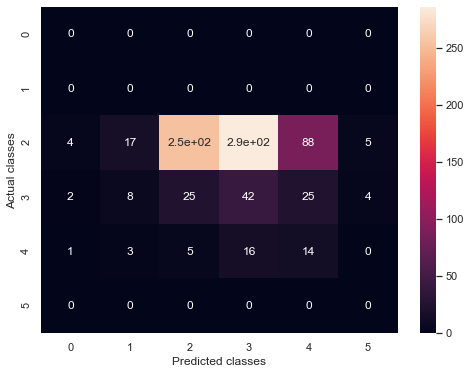

In [52]:
sns.set(rc={'figure.figsize':(8,6)})
cfm = confusion_matrix(predicted_classes, Y_red_t.values)
sns.heatmap(cfm, annot=True)
print(cfm)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

Kroswalidacja/ Cross Validation

In [53]:
cross_val_model = LogisticRegression(random_state=0)
scores = cross_val_score(cross_val_model, X_train_red, Y_red, cv=3)
print(scores)
print(np.mean(scores))

[0.58052434 0.54511278 0.60150376]
0.5757136286408906


Precyzyjne dostrajanie modelu/ Fine Tuning the Model

In [54]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
random_state=[0]

# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty, random_state=random_state)

In [55]:
clf = GridSearchCV(estimator = model, param_grid = hyperparameters, cv=3)
best_model = clf.fit(X_train_red, Y_red)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

C:\Users\amich\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amich\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amich\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\amich\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amich\anaconda3\lib\site-packages\sklearn\model_selection\_v

Best Penalty: l2
Best C: 1.0


C:\Users\amich\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
best_predicted_values = best_model.predict(X_train_red)
print(best_predicted_values)

[5 5 5 5 5 5 5 6 6 5 5 5 5 6 5 5 5 5 5 5 5 5 6 5 6 5 6 6 5 6 5 6 5 5 5 5 6
 6 4 5 5 5 6 6 5 6 5 5 5 5 5 6 6 5 5 5 5 5 5 5 5 5 5 5 6 6 5 6 6 6 5 5 5 5
 5 6 6 6 5 5 5 5 5 5 6 5 6 5 5 5 5 6 6 5 5 6 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5
 5 5 6 5 6 5 5 6 5 5 6 5 5 5 5 4 4 6 6 5 6 6 6 5 5 5 5 5 5 5 5 7 6 7 5 5 5
 6 6 6 5 5 5 5 5 5 5 5 5 5 6 6 5 5 5 5 5 5 5 5 6 6 6 5 6 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 5 5 5 5 6 6 5 5 6 7 5 6 5 5 5 6 5 5 5 5 5
 5 5 5 6 5 5 6 6 6 6 6 6 5 5 5 5 5 5 5 6 5 6 6 6 5 5 5 6 6 6 6 5 6 5 6 5 5
 6 6 5 6 5 6 6 5 6 6 6 6 6 5 5 5 6 6 6 7 6 6 6 5 6 6 6 6 6 6 5 6 6 6 6 6 5
 5 6 6 5 6 6 6 5 5 5 5 6 6 5 5 5 5 5 6 6 5 5 6 5 6 5 5 5 5 5 7 7 6 6 6 6 5
 6 6 7 7 6 6 7 6 6 6 6 6 6 6 7 6 5 6 5 5 6 5 6 6 7 6 6 5 6 5 6 5 7 5 5 5 7
 5 6 7 5 6 7 7 7 7 6 6 6 6 6 5 5 5 5 5 6 6 6 5 5 5 6 5 5 5 5 5 6 5 5 5 6 6
 6 6 5 5 5 5 7 5 5 6 5 6 5 6 6 5 6 5 6 6 5 5 5 6 5 7 5 6 5 5 6 6 5 6 6 5 6
 6 5 6 6 6 6 6 5 6 6 6 7 5 5 6 5 6 5 6 5 6 6 6 7 5 5 6 6 6 6 6 5 6 6 5 5 5
 7 6 6 7 5 5 5 6 6 5 7 7 

In [57]:
accuracy_score(best_predicted_values, Y_red_t.values)

0.37546933667083854

Zapisywanie modelu do Pickle/ Saving the model to pickle

In [58]:
filename = 'final_model_red.sav'
pickle.dump(model, open(filename, 'wb'))

2. Wino białe/ White wine:

Budowanie modelu/ Building the model

In [59]:
full_pipeline = createPipeline()

In [60]:
train_data_white = white_wine_data.head(int(len(white_wine_data.index)/2))
test_data_white = white_wine_data.tail(int(len(white_wine_data.index)/2))

Przygotowanie danych do trenowania/ Preparing the data for training

In [61]:
train_copy_white = train_data_white.copy()

In [62]:
bins = (3, 7, 9)
group_names = ['bad', 'good']
white_wine_data['quality'] = pd.cut(white_wine_data['quality'], bins = bins, labels = group_names)
white_wine_data['quality'].unique()

['bad', 'good', NaN]
Categories (2, object): ['bad' < 'good']

In [63]:
label_quality = LabelEncoder()

In [64]:
white_wine_data['quality'] = label_quality.fit_transform(white_wine_data['quality'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
white_wine_data['quality'].value_counts()

Trenowanie i testowanie modelu/ Training and testing the model

In [ ]:
X_white = train_copy_white.drop('quality', axis =1)
Y_white = train_copy_white['quality']

In [ ]:
sc = StandardScaler()
X_train_white = sc.fit_transform(X_white)

print(X_train_white.shape)

In [ ]:
model = LogisticRegression(random_state=0)
model.fit(X_train_white, Y_white)

In [ ]:
model.coef_

In [ ]:
test_copy_white = test_data_white.copy()

X_white_t = test_copy_white.drop('quality', axis =1)
Y_white_t = test_copy_white['quality']

In [ ]:
sc = StandardScaler()
X_test_white = sc.fit_transform(X_white_t)

print(X_test_white.shape)

In [ ]:
predicted_classes = model.predict(X_white_t)
print(predicted_classes)

Ewaluacja modelu/ Model Evaluation

In [ ]:
accuracy_score(predicted_classes, Y_white_t.values)

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
cfm = confusion_matrix(predicted_classes, Y_white_t.values)
sns.heatmap(cfm, annot=True)
print(cfm)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

Kroswalidacja/ Cross Validation

In [ ]:
cross_val_model = LogisticRegression(random_state=0)
scores = cross_val_score(cross_val_model, X_train_red, Y_red, cv=3)
print(scores)
print(np.mean(scores))

Precyzyjne dostrajanie modelu/ Fine Tuning the Model

In [ ]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
random_state=[0]

# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty, random_state=random_state)

In [ ]:
clf = GridSearchCV(estimator = model, param_grid = hyperparameters, cv=3)
best_model = clf.fit(X_train_white, Y_white)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
best_predicted_values = best_model.predict(X_train_red)
print(best_predicted_values)

In [ ]:
accuracy_score(best_predicted_values, Y_white_t.values)

Zapisywanie modelu do Pickle/ Saving the model to pickle

In [ ]:
filename = 'final_model_white.sav'
pickle.dump(model, open(filename, 'wb'))

Podsumowanie/ Summary:
---

PL: Przewidywania sprawdziły się lepiej w przypadku wina czerwonego.
Projekt zawiera błędy.

ENG: The forecast proved to be better for red wine.
The project has errors.